In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle
!cp "kaggle (4).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (4).json to kaggle (4).json
User uploaded file "kaggle (4).json" with length 66 bytes


In [ ]:
import os
os.rename("kaggle (4).json", "kaggle.json")

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d zafarali27/netflix-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/zafarali27/netflix-movies-and-tv-shows
License(s): CC0-1.0
netflix-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

file_name = "/content/netflix-movies-and-tv-shows.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os

# List files in the current directory
print("Files in current directory:")
print(os.listdir("/content"))


Files in current directory:
['.config', 'netflix-movies-and-tv-shows.zip', 'kaggle.json', 'Netflix_Movies_and_TV_Shows.csv', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
file_path = "/content/Netflix_Movies_and_TV_Shows.csv"

df = pd.read_csv(file_path)
df.head()

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


In [ ]:
df.shape



(3000, 7)

In [ ]:
df.columns

Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Title,0
Type,0
Genre,0
Release Year,0
Rating,0
Duration,0
Country,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)
df["Release Year"] =pd.to_datetime(df["Release Year"],format="%Y")

In [ ]:
df["Genre"].value_counts()

,count
Genre,
Horror,398
Thriller,398
Drama,378
Romance,376
Comedy,369
Documentary,369
Action,367
Sci-Fi,345


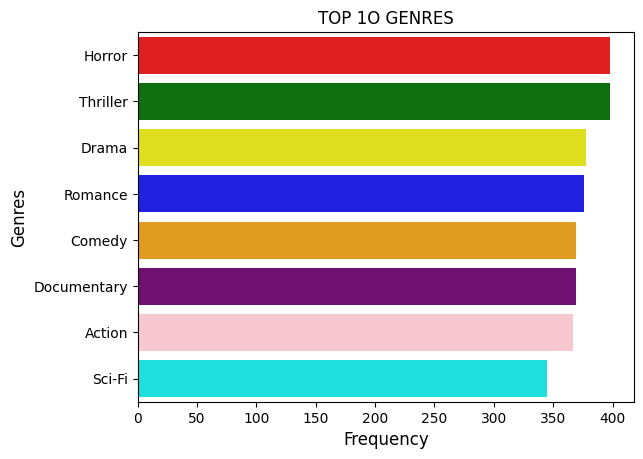

In [ ]:
colors = ["red", "green", "yellow", "blue", "orange", "purple", "pink", "cyan", "lime", "brown"]
top_genres= df["Genre"].value_counts().head(10)
sns.barplot(y=top_genres.index,x = top_genres.values,palette=colors)
plt.title("TOP 1O GENRES")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.show()

In [ ]:
df["Type"].value_counts()

,count
Type,
TV Show,1527
Movie,1473


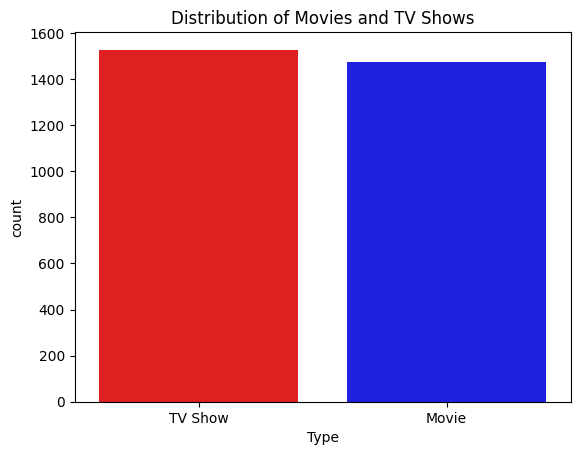

In [ ]:
sns.countplot(data = df,x= "Type", palette=["red", "blue"] )
plt.title("Distribution of Movies and TV Shows")
plt.show()

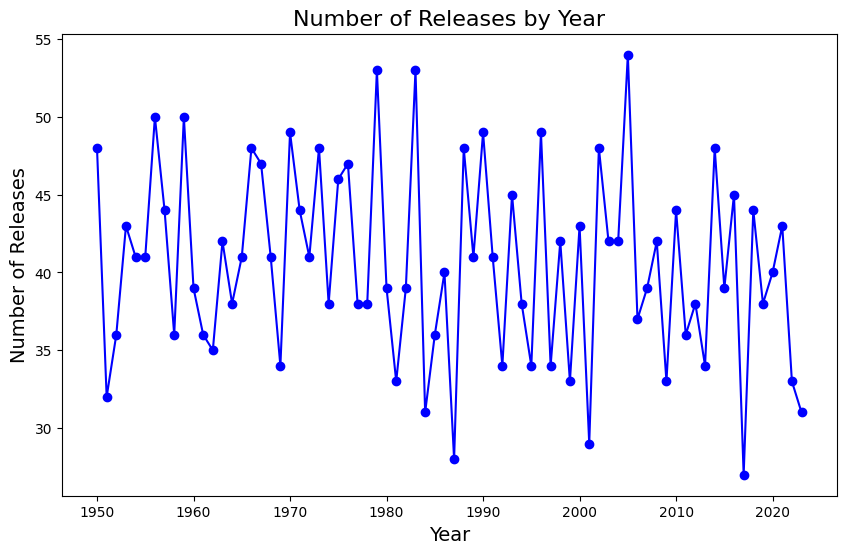

In [ ]:
# Count the number of releases by year and sort by index
release_year_counts = df["Release Year"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(
    release_year_counts.index,  # Correctly access the index
    release_year_counts.values,  # Correctly access the values
    marker="o",
    linestyle="-",
    color="b"
)

# Add title and labels
plt.title("Number of Releases by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Releases", fontsize=14)

# Display the plot
plt.show()



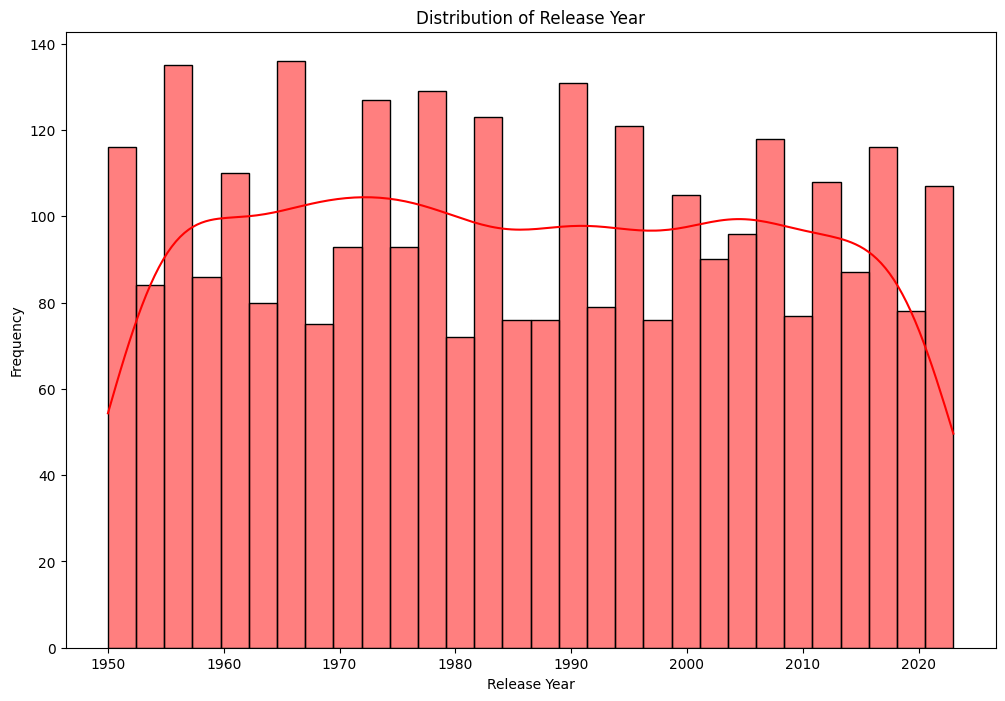

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df["Release Year"],bins =30,kde= True,color = "red")
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df["Country"].value_counts()

,count
Country,
Canada,421
United Kingdom,392
South Korea,376
Germany,373
Australia,371
United States,369
Japan,349
India,349


In [ ]:
joint_data = pd.read_csv("/content/Netflix_Movies_and_TV_Shows.csv")
joint_data.head()

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [ ]:
country_count = joint_data["Country"].value_counts().sort_values(ascending = False)
country_count= pd.DataFrame(country_count)
topcountries = country_count[0:10]
topcountries

,count
Country,
Canada,421
United Kingdom,392
South Korea,376
Germany,373
Australia,371
United States,369
Japan,349
India,349


In [ ]:
df["Rating"].value_counts()

,count
Rating,
TV-14,441
R,441
PG,434
TV-PG,430
PG-13,422
TV-MA,418
G,414


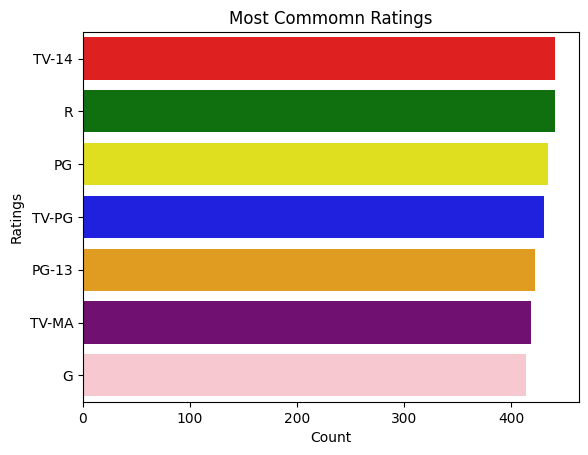

In [ ]:
colors = ["red", "green", "yellow", "blue", "orange", "purple", "pink", "cyan", "lime", "brown"]
top_ratings= df["Rating"].value_counts().head(10)
sns.barplot(y=top_ratings.index,x = top_ratings.values,palette=colors)
plt.title("Most Commomn Ratings")
plt.xlabel("Count" )
plt.ylabel("Ratings")
plt.show()


In [ ]:
df.sample(5)

,Title,Type,Genre,Release Year,Rating,Duration,Country
1695,Title 1696,TV Show,Action,1950-01-01,G,156 min,Canada
2756,Title 2757,Movie,Horror,2020-01-01,TV-MA,2 Seasons,India
2777,Title 2778,TV Show,Sci-Fi,2012-01-01,PG-13,90 min,South Korea
2369,Title 2370,TV Show,Action,2017-01-01,PG,1 Seasons,United States
944,Title 945,TV Show,Drama,2021-01-01,TV-MA,1 Seasons,United States


In [ ]:
unique_rating = df["Rating"].unique()
unique_rating

array(['PG', 'G', 'TV-PG', 'PG-13', 'TV-14', 'TV-MA', 'R'], dtype=object)

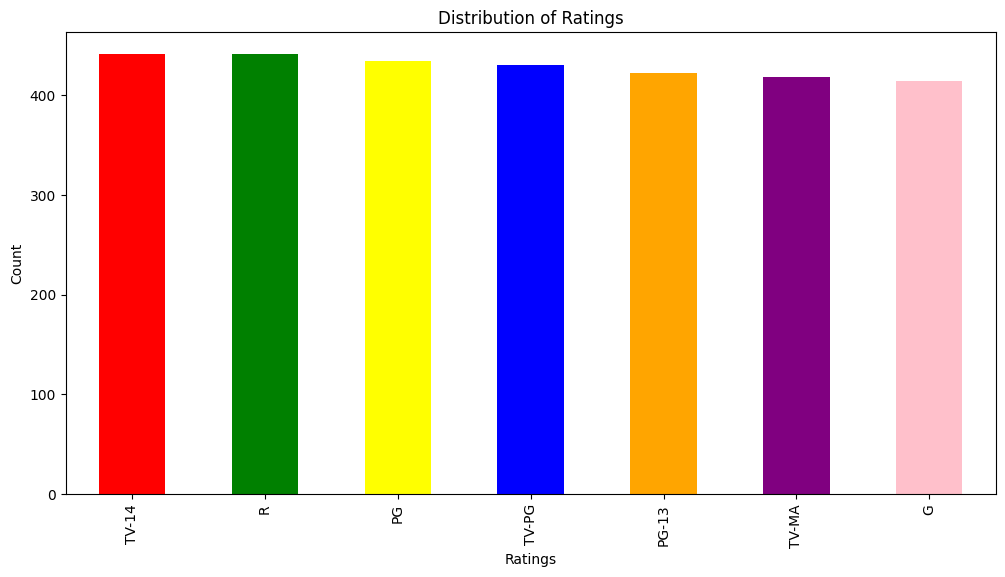

In [ ]:
colors = ["red", "green", "yellow", "blue", "orange", "purple", "pink", "cyan", "lime", "brown"]
rating_distribution= df["Rating"].value_counts()
plt.figure(figsize=(12,6))
rating_distribution.plot(kind = "bar",color=colors)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Duration"].value_counts()

,count
Duration,
3 Seasons,494
1 Seasons,492
2 Seasons,490
97 min,23
173 min,21
...,...
110 min,7
133 min,6
96 min,5


In [ ]:
df.head(3)

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955-01-01,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020-01-01,G,3 Seasons,India
2,Title 3,TV Show,Action,1966-01-01,TV-PG,140 min,United States


In [ ]:
df["Release_day"] = pd.to_datetime(df["Release Year"], format="%d%m%Y").dt.day

df["Release_month"] = pd.to_datetime(df["Release Year"], format="%m").dt.month
df["Release_year"]= pd.to_datetime(df["Release Year"], format="%Y").dt.year

In [ ]:
df.head(4)

,Title,Type,Genre,Release Year,Rating,Duration,Country,Release_day,Release_month,Release_year
0,Title 1,TV Show,Comedy,1955-01-01,PG,3 Seasons,Japan,1,1,1955
1,Title 2,TV Show,Horror,2020-01-01,G,3 Seasons,India,1,1,2020
2,Title 3,TV Show,Action,1966-01-01,TV-PG,140 min,United States,1,1,1966
3,Title 4,Movie,Thriller,2011-01-01,PG-13,3 Seasons,Canada,1,1,2011


In [ ]:
df.columns

Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country', 'Release_day', 'Release_month', 'Release_year'],
      dtype='object')

In [ ]:
df.drop(columns=["Title","Release Year"],axis =1,inplace = True)

In [ ]:
df.head(3)

,Type,Genre,Rating,Duration,Country,Release_day,Release_month,Release_year
0,TV Show,Comedy,PG,3 Seasons,Japan,1,1,1955
1,TV Show,Horror,G,3 Seasons,India,1,1,2020
2,TV Show,Action,TV-PG,140 min,United States,1,1,1966


In [ ]:
def convert_to_minutes(duration):
  if "Season" in duration:
    num_seasons = int(duration.split()[0])
    return num_seasons*400
  elif "min" in duration:
    return int(duration.split()[0])
  else:
    return None

df["Duration_minutes"]= df["Duration"].apply(convert_to_minutes)


In [ ]:
df.head(3)

,Type,Genre,Rating,Duration,Country,Release_day,Release_month,Release_year,Duration_minutes
0,TV Show,Comedy,PG,3 Seasons,Japan,1,1,1955,1200
1,TV Show,Horror,G,3 Seasons,India,1,1,2020,1200
2,TV Show,Action,TV-PG,140 min,United States,1,1,1966,140


In [ ]:
df.drop(columns=["Duration"],axis =1,inplace= True)

In [ ]:
df["Release_year"] = pd.to_numeric(df["Release_year"],errors="coerce")

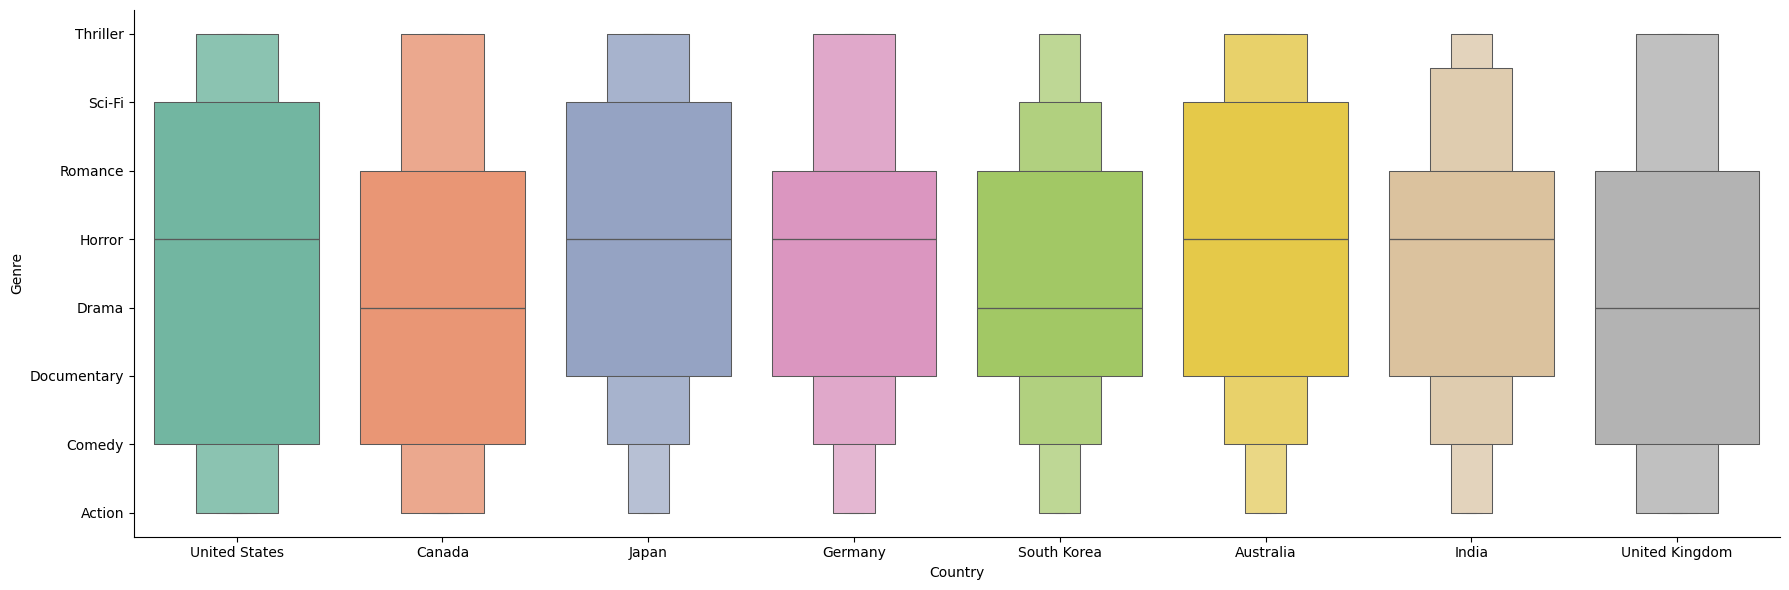

In [ ]:
## Country vs Genre
sns.catplot(y = "Genre",x ="Country",data = df.sort_values("Genre",ascending = False),kind = "boxen",height=6,aspect=3,palette = "Set2" )

In [ ]:
grouped_data = df.groupby(['Genre', 'Country']).size().reset_index(name='Count')
print(grouped_data.head())


    Genre    Country  Count
0  Action  Australia     32
1  Action     Canada     65
2  Action    Germany     42
3  Action      India     43
4  Action      Japan     41


In [ ]:
country_genre_count = df.groupby("Country")["Genre"].nunique().reset_index(name = "Unique Genres")
max_categories_country = country_genre_count.sort_values(by = "Unique Genres",ascending = False).head(1)
max_categories_country

,Country,Unique Genres
0,Australia,8


In [ ]:
# Group by 'Country' and count the number of unique genres
country_genre_count = df.groupby('Country')['Genre'].nunique().reset_index(name='UniqueGenres')

# Group by 'Country' and count the number of unique genres
country_genre_count = df.groupby('Country')['Genre'].nunique().reset_index(name='UniqueGenres')

# Find the maximum number of unique genres
max_genres = country_genre_count['UniqueGenres'].max()

# Filter the countries that have this maximum number of genres
countries_with_max_genres = country_genre_count[country_genre_count['UniqueGenres'] == max_genres]

# Get the genres for these countries
result = {}
for country in countries_with_max_genres['Country']:
    genres = df[df['Country'] == country]['Genre'].unique()
    result[country] = genres

# Print the countries and their genres
print(countries_with_max_genres)
for country, genres in result.items():
    print(f"Country: {country}, Genres: {', '.join(genres)}")




          Country  UniqueGenres
0       Australia             8
1          Canada             8
2         Germany             8
3           India             8
4           Japan             8
5     South Korea             8
6  United Kingdom             8
7   United States             8
Country: Australia, Genres: Romance, Documentary, Sci-Fi, Horror, Action, Comedy, Thriller, Drama
Country: Canada, Genres: Thriller, Drama, Documentary, Comedy, Romance, Horror, Action, Sci-Fi
Country: Germany, Genres: Action, Sci-Fi, Drama, Documentary, Comedy, Thriller, Romance, Horror
Country: India, Genres: Horror, Romance, Thriller, Comedy, Drama, Sci-Fi, Action, Documentary
Country: Japan, Genres: Comedy, Action, Horror, Drama, Documentary, Thriller, Romance, Sci-Fi
Country: South Korea, Genres: Drama, Horror, Documentary, Action, Romance, Comedy, Sci-Fi, Thriller
Country: United Kingdom, Genres: Comedy, Romance, Drama, Documentary, Thriller, Action, Horror, Sci-Fi
Country: United States, Genres: 

In [ ]:
Country = df[["Country"]]
Country = pd.get_dummies(Country, drop_first=True).astype(int)
Country.head(5)



,Country_Canada,Country_Germany,Country_India,Country_Japan,Country_South Korea,Country_United Kingdom,Country_United States
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
Genre = df[["Genre"]]
Genre = pd.get_dummies(Genre,drop_first = True).astype(int)
Genre.head(5)

,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Sci-Fi,Genre_Thriller
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


In [ ]:
Rating = df[["Rating"]]
Rating = pd.get_dummies(Rating, drop_first = True).astype(int)
Rating.head(5)

,Rating_PG,Rating_PG-13,Rating_R,Rating_TV-14,Rating_TV-MA,Rating_TV-PG
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [ ]:
df.head(3)

,Type,Genre,Rating,Country,Release_day,Release_month,Release_year,Duration_minutes
0,TV Show,Comedy,PG,Japan,1,1,1955,1200
1,TV Show,Horror,G,India,1,1,2020,1200
2,TV Show,Action,TV-PG,United States,1,1,1966,140


In [ ]:
Type = df[["Type"]]
Type = pd.get_dummies(Type, drop_first=True).astype(int)
Type.head(3)

,Type_TV Show
0,1
1,1
2,1


In [ ]:
df_netflix = pd.concat([df,Genre,Rating,Country,Type],axis =1)

In [ ]:
df_netflix.columns

Index(['Type', 'Genre', 'Rating', 'Country', 'Release_day', 'Release_month',
       'Release_year', 'Duration_minutes', 'Genre_Comedy', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Horror', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Thriller', 'Rating_PG', 'Rating_PG-13', 'Rating_R',
       'Rating_TV-14', 'Rating_TV-MA', 'Rating_TV-PG', 'Country_Canada',
       'Country_Germany', 'Country_India', 'Country_Japan',
       'Country_South Korea', 'Country_United Kingdom',
       'Country_United States', 'Type_TV Show'],
      dtype='object')

In [ ]:
df_netflix.drop(columns=["Genre","Rating","Country","Type"],axis =1,inplace = True)

In [ ]:
df_netflix.head(3)

,Release_day,Release_month,Release_year,Duration_minutes,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Sci-Fi,...,Rating_TV-MA,Rating_TV-PG,Country_Canada,Country_Germany,Country_India,Country_Japan,Country_South Korea,Country_United Kingdom,Country_United States,Type_TV Show
0,1,1,1955,1200,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,2020,1200,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,1966,140,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
df_netflix.shape

(3000, 25)